<a href="https://colab.research.google.com/github/AnirudhPhophalia/Devanagri_mnist_hindidigit_analysis/blob/main/Devanigiri_digits_mnist_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clear all previous variables from memory (force reset)
%reset -f


Download the datset of devnagri digits

In [ ]:
import kagglehub

# Download dataset from Kaggle
path = kagglehub.dataset_download("khushimehta1729/devanagri-characters-and-numbers")
print("Path to dataset files:", path)


100%|██████████| 76.1M/76.1M [00:00<00:00, 147MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/khushimehta1729/devanagri-characters-and-numbers/versions/1


Now find the folder structure for proper loading of digits datset only as the whole data contains hindi characters also.


In [ ]:
import os

# List contents
for root, dirs, files in os.walk(path):
    print(root)
    if len(files) > 0:
        print(f"  {len(files)} files")


/root/.cache/kagglehub/datasets/khushimehta1729/devanagri-characters-and-numbers/versions/1
/root/.cache/kagglehub/datasets/khushimehta1729/devanagri-characters-and-numbers/versions/1/DevanagariHandwrittenCharacterDataset
/root/.cache/kagglehub/datasets/khushimehta1729/devanagri-characters-and-numbers/versions/1/DevanagariHandwrittenCharacterDataset/Train
/root/.cache/kagglehub/datasets/khushimehta1729/devanagri-characters-and-numbers/versions/1/DevanagariHandwrittenCharacterDataset/Train/character_25_ma
  1700 files
/root/.cache/kagglehub/datasets/khushimehta1729/devanagri-characters-and-numbers/versions/1/DevanagariHandwrittenCharacterDataset/Train/character_33_ha
  1700 files
/root/.cache/kagglehub/datasets/khushimehta1729/devanagri-characters-and-numbers/versions/1/DevanagariHandwrittenCharacterDataset/Train/character_3_ga
  1700 files
/root/.cache/kagglehub/datasets/khushimehta1729/devanagri-characters-and-numbers/versions/1/DevanagariHandwrittenCharacterDataset/Train/character_35

In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# it is the path where all our digits are located
base_path = "/root/.cache/kagglehub/datasets/khushimehta1729/devanagri-characters-and-numbers/versions/1/DevanagariHandwrittenCharacterDataset/Train"

images, labels = [], []

# as teh digits are in differnt folder , make a for loop to load digits from each folder
for i in range(10):
    folder = os.path.join(base_path, f"digit_{i}")
    if not os.path.exists(folder):
        print(f"the given folder DNE: {folder}")
        continue

    #  now we will loop through all images in teh folder ot load them correctly
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (32, 32))
             # if the image will be succesfully loaded resizing it for better consistency and tehn finally appending it into the lists
            images.append(img)
            labels.append(i)

# reashapeing and normalization
X = np.array(images).reshape(-1, 32, 32, 1).astype("float32") / 255.0
y = np.array(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Hindi digits loaded successfully")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Hindi digits loaded successfully
X_train shape: (13600, 32, 32, 1)
X_test shape: (3400, 32, 32, 1)


Now we got the shape and like we can just visualize the images once for confirmation

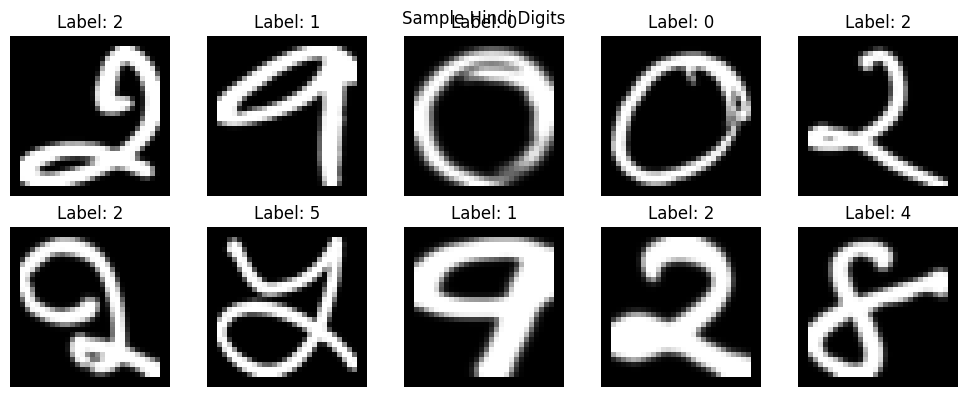

In [ ]:
import matplotlib.pyplot as plt

# Show 10 sample images from the training set
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(32, 32), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Sample Hindi Digits")
plt.show()


ya so all the digits looks pretty good, greta

now lets build our cnn model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),  # Conv layer 1
    MaxPooling2D((2, 2)),  # Pooling layer 1
    Conv2D(64, (3, 3), activation='relu'), # Conv layer 2
    MaxPooling2D((2, 2)),  # Pooling layer 2
    Flatten(),   # Flatten for dense layers
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.3),   # Regularization
    Dense(10, activation='softmax')  # Output layer for classification
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# now lets compile our model with basic optimizer adam and also print summary of the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,146 (1.20 MB)

 Trainable params: 315,146 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# now lets train teh model that is fit it
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.1)


Epoch 1/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9927 - loss: 0.0231 - val_accuracy: 0.9897 - val_loss: 0.0249
Epoch 2/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9963 - loss: 0.0139 - val_accuracy: 0.9919 - val_loss: 0.0259
Epoch 3/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.9945 - loss: 0.0158 - val_accuracy: 0.9949 - val_loss: 0.0234
Epoch 4/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9956 - loss: 0.0121 - val_accuracy: 0.9926 - val_loss: 0.0314
Epoch 5/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9941 - loss: 0.0166 - val_accuracy: 0.9963 - val_loss: 0.0211


In [ ]:
# thats graet now lets evaluate our moel
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9954 - loss: 0.0170
Test Accuracy: 0.9932


Thats great  99.32%

Now kets see which digit is confusing with others by plotting a confusion matrix

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


<Figure size 800x600 with 0 Axes>

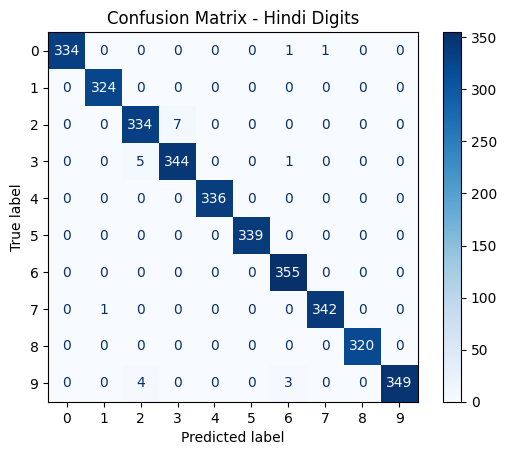

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict test labels
y_pred = np.argmax(model.predict(X_test), axis=1)

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Hindi Digits")
plt.show()


ohh we can see that the number 2 and 3 are easily mismatched as well as the number 9 with 2 and 6 also, but we can like not pay any attention as the mismatching is very few

So now lets use data augmentation to imrove our accuracy

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# creating data geneartor fro augemntation
datagen = ImageDataGenerator(
    rotation_range=10,        # randomly rotate ±10 degrees
    width_shift_range=0.1,    # shift horizontally
    height_shift_range=0.1,   # shift vertically
    zoom_range=0.1,           # zoom in/out
    shear_range=0.1,          # apply shearing
)

# fit the data generator to the training data
datagen.fit(X_train)


In [ ]:
# now lets retrain our model
history_aug = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                        validation_data=(X_test, y_test),
                        epochs=5)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9301 - loss: 0.2303 - val_accuracy: 0.9956 - val_loss: 0.0179
Epoch 2/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9644 - loss: 0.1124 - val_accuracy: 0.9965 - val_loss: 0.0122
Epoch 3/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.9747 - loss: 0.0787 - val_accuracy: 0.9959 - val_loss: 0.0121
Epoch 4/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9755 - loss: 0.0775 - val_accuracy: 0.9959 - val_loss: 0.0096
Epoch 5/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.9818 - loss: 0.0610 - val_accuracy: 0.9968 - val_loss: 0.0080


In [ ]:
# now lets reavluate our model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9970 - loss: 0.0072
Test Accuracy: 0.9968


lets replot the confusion matrix

See on doing it our accuracy increased from 99.32 to 99.68%. Oh thats great

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


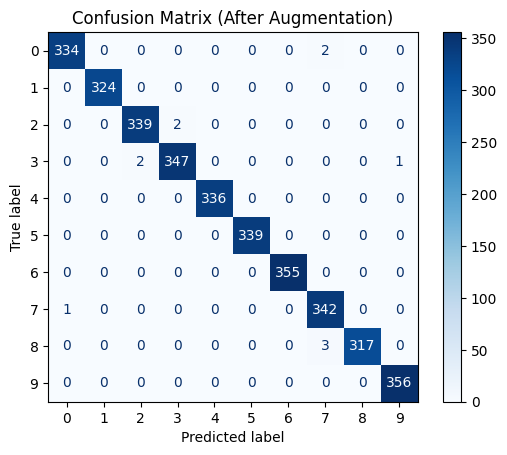

In [ ]:
y_pred_aug = np.argmax(model.predict(X_test), axis=1)

# Updated confusion matrix
cm_aug = confusion_matrix(y_test, y_pred_aug)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_aug, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (After Augmentation)")
plt.show()


Oh see the mismatch between number 2,3 and 9 are become fewer than before also, but ya the mismatch between number 7 and 8 is increased but let it be as it is not much , we may ignore it
